In [266]:
import pandas as pd
import numpy as np
import os, pickle
from pandasai import PandasAI as pdai
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime, timedelta

# Import dataset and exploration

In [63]:
#list all files in data folder
files = os.listdir('data')


In [64]:
files[0].replace(".csv","")
#load files[0] in a dataframe
df = pd.read_csv('data/'+files[0])

/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/3345907934.py:3: DtypeWarning:

Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.



In [65]:
#for file in files load file csv in a dataframe
datas={}
for file in files:
    datas[file.replace(".csv","")]=pd.read_csv('data/'+file)




/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/4195821602.py:4: DtypeWarning:

Columns (28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.



In [66]:
datas.keys()

dict_keys(['weather_legs', 'legs', 'user_details', 'experience_factors', 'mots', 'user_generic_worthwhileness_values', 'worthwhileness_elements_from_trips', 'activities', 'user_specific_worthwhileness_values', 'weather_raw', 'legs_coordinates', 'trips', 'purposes'])

In [67]:
datas['legs']['dateonly']=datas['legs']['start_date'].apply(lambda x: x.split(' ')[0])

In [68]:
#return the average number of tripid per user per day
datas['legs'].groupby(['userid','dateonly']).count().groupby('userid').mean()['tripid'].mean()

4.597558471373145

In [69]:
datas['legs']['transport_category'].value_counts()

transport_category
walking                           55246
private_motorized                 30537
cycling_emerging_micromobility    19234
public_transp_short_dist          14510
public_transp_long_dist            1104
Name: count, dtype: int64

In [70]:
datas['legs'][pd.isna(datas['legs']['transport_category'])]

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,worthwhileness_rating,transport_category,campaign,weekday,weekday_class,dateonly
15,#28:2213,WaitingEvent,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:3465,4,2019-06-13 07:07:33.756,2019-06-13 07:09:25.096,NaN,NaN,0.000,-1.0,NaN,BEL,Thursday,Working_day,2019-06-13
40,#28:1036,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 08:00:21.952,2019-05-11 08:05:56.037,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
42,#29:1014,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 08:35:08.045,2019-05-11 08:40:49.986,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
45,#26:1077,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 10:27:05.206,2019-05-11 10:31:02.239,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
47,#27:1059,WaitingEvent,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1596,4,2019-05-11 10:36:32.177,2019-05-11 10:42:43.123,NaN,NaN,0.000,-1.0,NaN,BEL,Saturday,Weekend,2019-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158861,#223:46511,Leg,vKi94YKUGFfKXGvGyogidfF6qU32,#130:20544,4,2019-11-06 18:50:44.096,2019-11-06 18:52:55.168,0.0,240.118,47.999,4.0,NaN,ESP,Wednesday,Working_day,2019-11-06
158864,#222:46518,Leg,vKi94YKUGFfKXGvGyogidfF6qU32,#131:20541,4,2019-11-14 19:35:39.264,2019-11-14 19:40:01.408,0.0,3085.847,188.006,0.0,NaN,ESP,Thursday,Working_day,2019-11-14
158874,#226:13390,WaitingEvent,vKi94YKUGFfKXGvGyogidfF6qU32,#130:21198,4,2019-11-29 08:19:06.880,2019-11-29 08:23:29.024,NaN,NaN,0.000,0.0,NaN,ESP,Friday,Working_day,2019-11-29
158878,#227:13250,WaitingEvent,xeO24JQhH5P2bPoO2QJrtdYwVlk1,#133:20946,4,2019-11-29 09:59:04.642,2019-11-29 10:23:47.928,NaN,NaN,0.000,3.0,NaN,ESP,Friday,Working_day,2019-11-29


In [71]:
datas['legs_coordinates']

,legid,start_lat,start_lon,end_lat,end_lon,start_name,start_country,start_class,end_name,end_country,end_class
0,#223:33591,51.100,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
1,#224:33591,51.130,3.165,51.130,3.165,Bruges,BEL,sub-urban,Bruges,BEL,sub-urban
2,#225:33590,51.130,3.165,51.130,3.165,Bruges,BEL,sub-urban,Bruges,BEL,sub-urban
3,#222:33592,51.150,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
4,#227:9335,51.150,3.050,51.150,3.050,NaN,NaN,rural,NaN,NaN,rural
...,...,...,...,...,...,...,...,...,...,...,...
180508,#224:47071,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180509,#225:47061,46.520,6.565,46.545,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180510,#222:47083,46.625,6.575,46.520,6.575,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
180511,#223:47078,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban


## Merge legs and legs_coordinates

In [72]:
legmerged=pd.merge(datas['legs'],datas['legs_coordinates'],on='legid')
legmerged

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,start_lat,start_lon,end_lat,end_lon,start_name,start_country,start_class,end_name,end_country,end_class
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,38.736,-9.141,38.735,-9.141,Lisbon,PRT,urban,Lisbon,PRT,urban
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,50.847,4.353,50.845,4.357,Brussels,BEL,urban,Brussels,BEL,urban
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,51.200,4.850,51.200,4.850,NaN,NaN,rural,NaN,NaN,rural
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,51.200,4.800,51.200,4.800,NaN,NaN,rural,NaN,NaN,rural
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,51.200,4.850,51.200,4.800,NaN,NaN,rural,NaN,NaN,rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,46.540,6.565,46.545,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130613,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,46.545,6.565,46.525,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130614,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban
130615,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,46.520,6.565,46.520,6.565,Lausanne,CHE,sub-urban,Lausanne,CHE,sub-urban


In [73]:
datas['user_details']['gender'].value_counts()

gender
Male      1880
Female    1435
Other       15
Name: count, dtype: int64

In [74]:
leg_coor_user_merged = pd.merge(legmerged,datas['user_details'],on='userid')
#parse start_date to datetime format
leg_coor_user_merged['start_date']=pd.to_datetime(leg_coor_user_merged['start_date'])
leg_coor_user_merged['end_date']=pd.to_datetime(leg_coor_user_merged['end_date'])
leg_coor_user_merged



,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,gender,age_range,lang,city,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,Male,16-24,eng,Lisboa,PRT,NaN,NaN,NaN,NaN,NaN
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,Male,25-49,dut,Brussels,BEL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130612,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130613,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130614,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN
130615,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,Male,25-49,NaN,Lausanne,CHE,NaN,NaN,NaN,NaN,NaN


In [75]:
leg_coor_user_merged.columns

Index(['legid', 'class', 'userid', 'tripid', 'motid', 'start_date', 'end_date',
       'true_distance', 'leg_distance', 'leg_duration',
       'worthwhileness_rating', 'transport_category', 'campaign', 'weekday',
       'weekday_class', 'dateonly', 'start_lat', 'start_lon', 'end_lat',
       'end_lon', 'start_name', 'start_country', 'start_class', 'end_name',
       'end_country', 'end_class', 'registration_date', 'gender', 'age_range',
       'lang', 'city', 'country', 'education_level',
       'marital_status_household', 'number_people_household',
       'labour_status_household', 'years_of_residence_household'],
      dtype='object')

## Convert to geodataframe

In [76]:
#take columns start_lat, start_lon, end_lat, end_lon from leg_coor_user_merged and create a geopandas dataframe with crs epsg 4326 and point geometry with start coordinate
import geopandas as gpd
from shapely.geometry import Point
leg_coor_user_merged['start_point']=leg_coor_user_merged.apply(lambda x: Point(x['start_lon'],x['start_lat']),axis=1)
#convert leg_coor_user_merged to geo dataframe
leg_coor_user_merged=gpd.GeoDataFrame(leg_coor_user_merged,geometry='start_point',crs='epsg:4326')

In [77]:
import geopandas as gpd
from geopandas.tools import sjoin
import matplotlib.pyplot as plt
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']





/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/2823248467.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



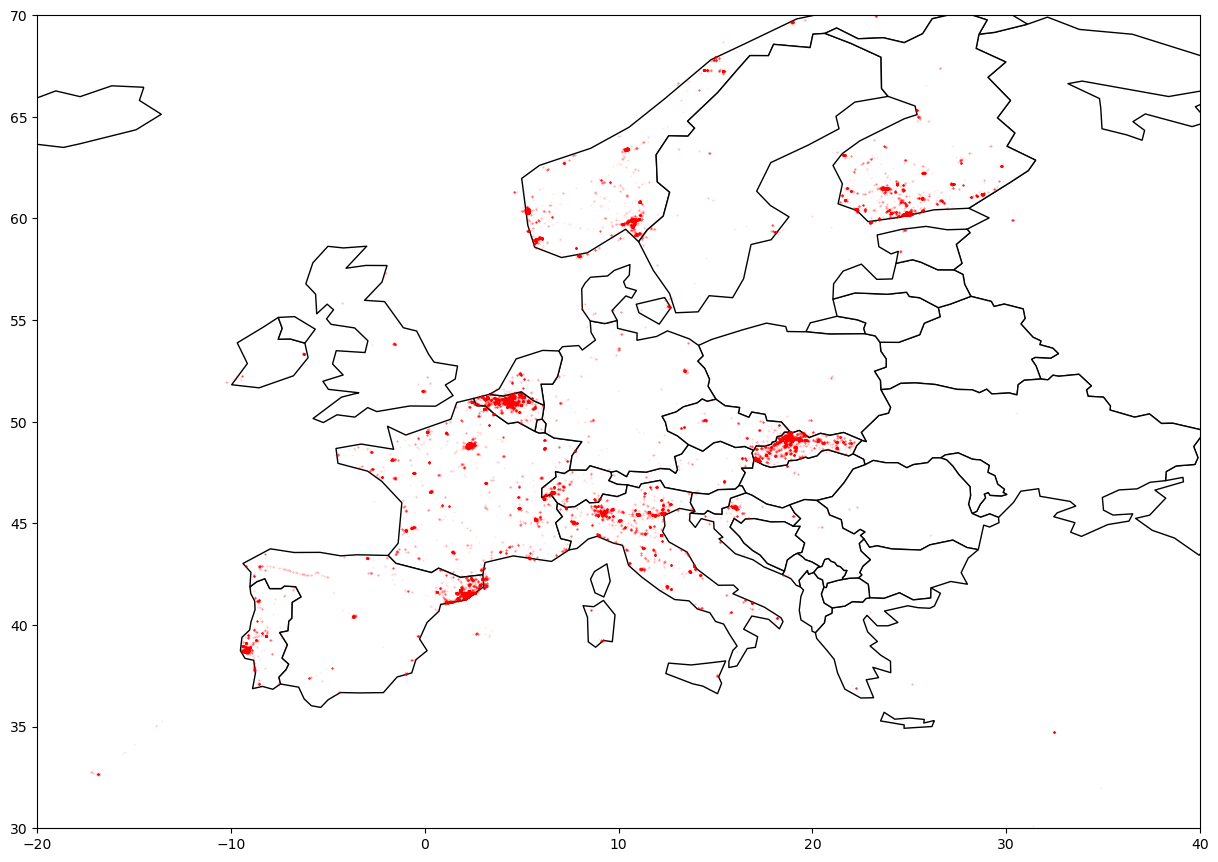

In [78]:
#plot leg_coor_user_merged['start_point'] on europe map
fig, ax = plt.subplots(figsize=(15,15))
europe.plot(ax=ax, color='white', edgecolor='black')
leg_coor_user_merged.plot(ax=ax, color='red', markersize=0.2, alpha=0.1)
ax.set_xlim(-20, 40)
ax.set_ylim(30, 70)
plt.show()




In [79]:
#filter leg_coor_user_merged to get only with both start and end inside italy
italy=world[world['name']=='Italy']


leg_coor_user_merged_italy=sjoin(leg_coor_user_merged,italy,how='inner',op='intersects')



/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



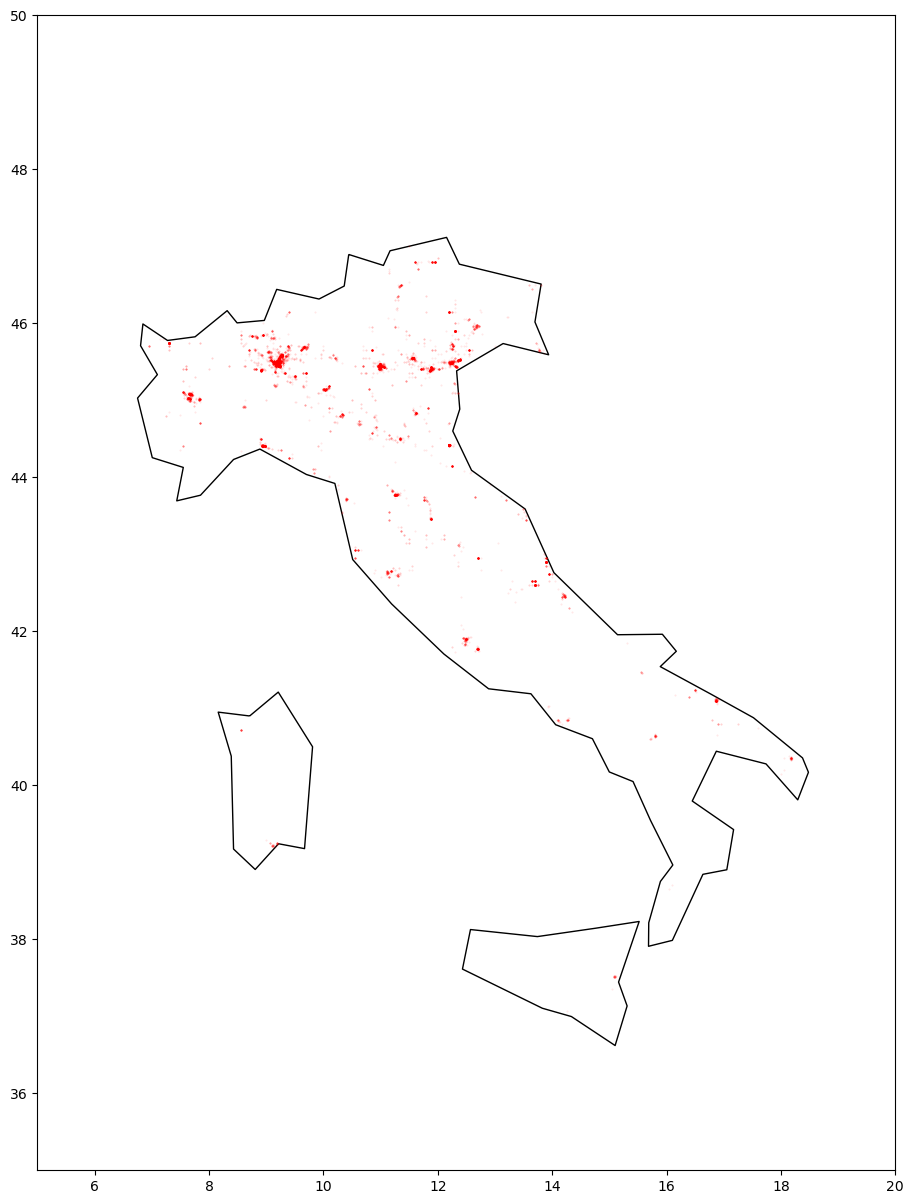

In [80]:
#do the same plot but for italy only
italy = world[world['name'] == 'Italy']
fig, ax = plt.subplots(figsize=(15,15))
italy.plot(ax=ax, color='white', edgecolor='black')
leg_coor_user_merged_italy.plot(ax=ax, color='red', markersize=0.2, alpha=0.1)
ax.set_xlim(5, 20)
ax.set_ylim(35, 50)
plt.show()


### Using more detailed map of europe

In [81]:
#import shapefile from Europe_coastline_shapefile folder
europe_coastline = gpd.read_file('Europe_coastline_shapefile/Europe_coastline_poly.shp')

#confert europe_coastline to epsg 4326
europe_coastline=europe_coastline.to_crs('epsg:4326')


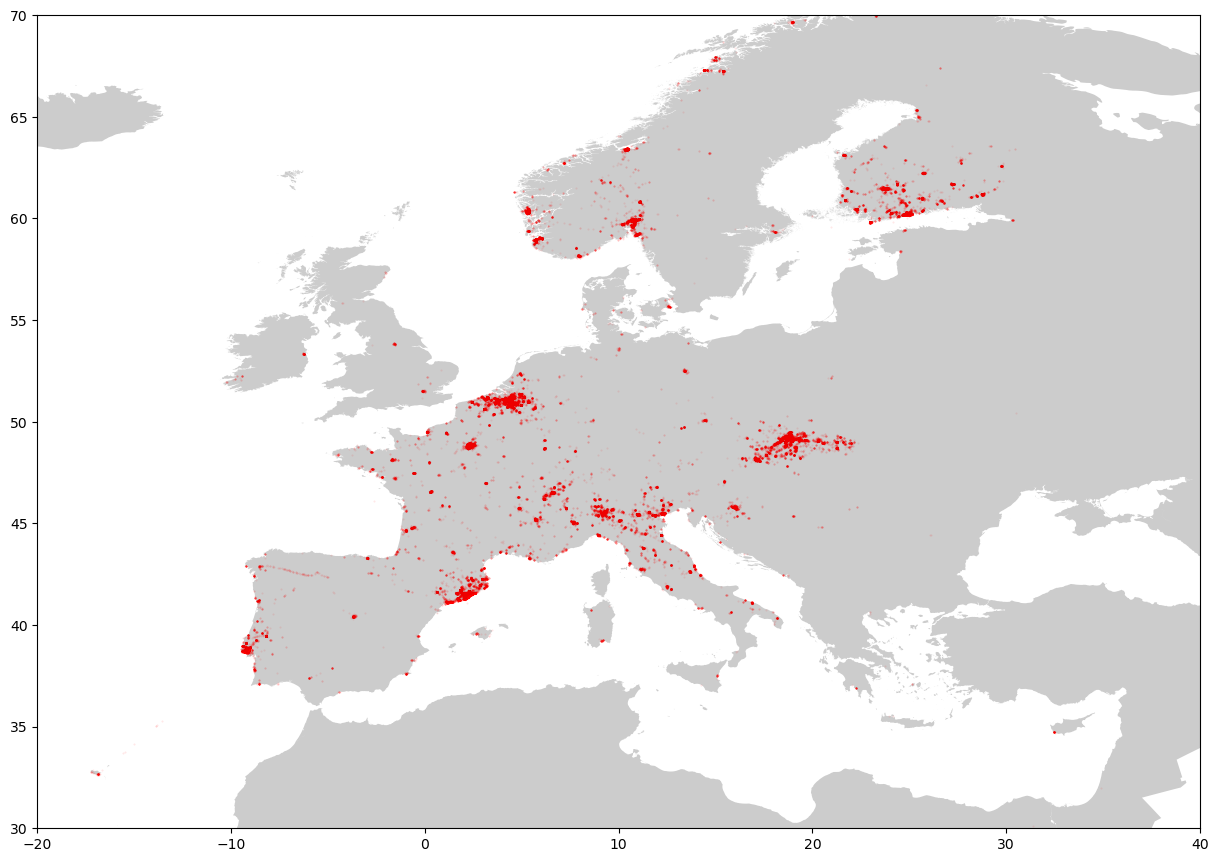

In [82]:

#plot leg_coor_user_merged['start_point'] on europe_coastline
fig, ax = plt.subplots(figsize=(15,15))
europe_coastline.plot(ax=ax,alpha=0.4, color='grey')
leg_coor_user_merged.plot(ax=ax, color='red', markersize=0.2, alpha=0.1)
ax.set_xlim(-20, 40)
ax.set_ylim(30, 70)
plt.show()


In [83]:
#how many legs per trip divided by gender
leg_coor_user_merged.groupby(['gender','tripid']).count()['legid'].groupby('gender').mean()


gender
Female    1.997427
Male      2.076364
Other     2.839695
Name: legid, dtype: float64

In [84]:
df = leg_coor_user_merged.groupby('country').count()['userid'].reset_index()
df.columns = ['country', 'count']

df['log10_count'] = np.log10(df['count'])

fig = px.choropleth(df,
                    locations='country',
                    color='log10_count',
                    hover_name='country',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Number of Users by Country (Log Scale)',
                    scope='europe'
                    )

fig.update_geos(projection_type="natural earth",
                lataxis_range=[35, 70], lonaxis_range=[-25, 45])
# change figure size
fig.update_layout(height=800, width=1000)

fig.show()


# Data analysis

## Merge with purpose and vehicle type

In [85]:
#join leg_coor_user_merged with datas['purposes'] on tripid
leg_coor_user_merged_purposes = pd.merge(leg_coor_user_merged,datas['purposes'],on='tripid') 

In [86]:
#find columns with more then 20000 nan values and drop them
todrop=leg_coor_user_merged_purposes.isna().sum()[leg_coor_user_merged_purposes.isna().sum()>20000].index.to_list()
leg_coor_user_merged_purposes.drop(columns=todrop,inplace=True)

In [87]:
leg_coor_user_merged_purposes.isna().sum()

legid                        0
class                        0
userid                       0
tripid                       0
motid                        0
start_date                   0
end_date                     0
true_distance            14101
leg_distance             14099
leg_duration                 0
worthwhileness_rating        0
transport_category       14199
campaign                     0
weekday                      0
weekday_class                0
dateonly                     0
start_lat                    0
start_lon                    0
end_lat                      0
end_lon                      0
start_class                  0
end_class                    0
gender                       0
age_range                    0
city                         0
country                      0
start_point                  0
purpose                      0
dtype: int64

In [88]:
leg_coor_user_merged_purposes

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,end_lat,end_lon,start_class,end_class,gender,age_range,city,country,start_point,purpose
0,#24:3498,Leg,o3QNooVleBR9WfbIaCqsaj3DlDl2,#32:1461,7,2019-05-06 16:26:16.773,2019-05-06 16:38:30.295,497.0,218.0,0.0,...,38.735,-9.141,urban,urban,Male,16-24,Lisboa,PRT,POINT (-9.14100 38.73600),Other
1,#25:3400,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#31:1449,7,2019-05-07 14:31:11.110,2019-05-07 14:36:22.474,0.0,385.0,0.0,...,50.845,4.357,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35300 50.84700),Home
2,#25:3460,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#30:1498,7,2019-05-07 15:40:10.952,2019-05-07 15:43:29.090,37.0,37.0,0.0,...,51.200,4.850,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Home
3,#24:3479,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:1435,1,2019-05-07 15:54:37.610,2019-05-07 16:00:42.174,0.0,580.0,0.0,...,51.200,4.800,rural,rural,Male,25-49,Brussels,BEL,POINT (4.80000 51.20000),Home
4,#23:5342,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#33:2147,9,2019-05-21 04:45:12.391,2019-05-21 04:47:30.021,658.0,658.0,0.0,...,51.200,4.800,rural,rural,Male,25-49,Brussels,BEL,POINT (4.85000 51.20000),Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168401,#222:47082,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:04:33.538,2019-11-28 12:10:38.924,206.0,206.0,365.0,...,46.545,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.54000),Work
168402,#223:47077,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,9,2019-11-28 12:10:38.924,2019-11-28 12:25:37.025,4957.0,4957.0,0.0,...,46.525,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.54500),Work
168403,#224:47071,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#131:20807,7,2019-11-28 12:25:37.025,2019-11-28 12:27:53.168,364.0,364.0,0.0,...,46.520,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.52000),Work
168404,#224:47070,Leg,8g5HrJBPR6bhIdMr6qln8AAq4pp1,#130:20811,7,2019-11-28 16:36:57.975,2019-11-28 16:38:29.151,78.0,78.0,0.0,...,46.520,6.565,sub-urban,sub-urban,Male,25-49,Lausanne,CHE,POINT (6.56500 46.52000),Everyday_Shopping


In [89]:
#join leg_coor_user_merged_purposes with datas['motid'] motid
leg_coor_user_merged_purposes_motid = pd.merge(leg_coor_user_merged_purposes,datas['mots'],on='motid')

In [90]:
# Group the data by 'gender' and 'tripid', count the number of unique 'legid' values within each group, and calculate the mean within each gender group
average_unique_legs_per_trip_gender = leg_coor_user_merged_purposes_motid.groupby(['gender', 'tripid'])['legid'].nunique().groupby('gender').mean()

print("Average number of unique legs per trip divided by gender:")
print(average_unique_legs_per_trip_gender)


Average number of unique legs per trip divided by gender:
gender
Female    1.997505
Male      2.076534
Other     2.839695
Name: legid, dtype: float64


In [91]:
leg_coor_user_merged_purposes_motid.purpose.unique()

array(['Other', 'Home', 'Business_Trip', 'Work', 'Leisure_Hobby',
       'Personal_Tasks_Errands', 'Everyday_Shopping', 'Pick_Up_Drop_Off'],
      dtype=object)

In [92]:
#select only row with purpose work
workonly=leg_coor_user_merged_purposes_motid[leg_coor_user_merged_purposes_motid['purpose'].isin(['Work'])]
workonly

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,end_lon,start_class,end_class,gender,age_range,city,country,start_point,purpose,mot_text
9,#22:8516,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:3481,7,2019-06-13 10:09:36.113,2019-06-13 14:04:40.217,62.0,212.0,0.0,...,4.348,urban,urban,Male,25-49,Brussels,BEL,POINT (4.34800 50.86200),Work,walking
12,#25:11165,Leg,IGpJc0Az17bxe4MT6pHDx6lQ3LD2,#32:4620,7,2019-07-02 05:26:11.712,2019-07-02 08:00:21.941,0.0,575.0,0.0,...,4.350,urban,urban,Male,25-49,Brussels,BEL,POINT (4.35600 50.84500),Work,walking
13,#22:3739,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#32:1547,7,2019-05-10 07:14:09.450,2019-05-10 07:26:15.517,324.0,324.0,0.0,...,4.385,urban,urban,Male,25-49,Brussels,BEL,POINT (4.38900 50.84600),Work,walking
26,#23:4562,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#33:1849,7,2019-05-13 07:03:01.686,2019-05-13 07:12:16.147,455.0,455.0,0.0,...,4.385,urban,urban,Male,25-49,Brussels,BEL,POINT (4.39000 50.84700),Work,walking
29,#24:4535,Leg,kgF4dsYgK6RN1Qp0kzJVyWnDaUe2,#31:1897,7,2019-05-13 16:00:56.030,2019-05-13 16:04:42.736,313.0,313.0,0.0,...,4.341,urban,urban,Male,25-49,Brussels,BEL,POINT (4.34300 50.83400),Work,walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168395,#23:4268,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#33:1723,32,2019-05-13 12:36:21.470,2019-05-13 13:01:53.416,0.0,12625.0,0.0,...,1.452,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.36600 43.65400),Work,otherPrivate
168399,#22:4287,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:1771,32,2019-05-13 14:51:32.172,2019-05-13 15:16:19.536,0.0,13079.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.36400 43.59000),Work,otherPrivate
168402,#23:5676,Leg,YYk66LyNMvguG1OwAsiQFLXOqXM2,#31:2339,36,2019-05-23 12:22:34.702,2019-05-23 12:51:01.790,0.0,12735.0,0.0,...,1.453,urban,urban,Male,25-49,Toulouse,FRA,POINT (1.49700 43.52800),Work,carSharingPassenger
168403,#25:6214,Leg,z5TAgZnoItOaDS6gMWU6SfadU4A2,#32:2560,36,2019-05-27 11:48:08.171,2019-05-27 13:06:18.708,0.0,8907.0,4690.0,...,-9.157,urban,urban,Male,50-64,Lisbon,PRT,POINT (-9.15100 38.73700),Work,carSharingPassenger


In [93]:
workonly.groupby(['gender','transport_category']).count()['legid']
#normalize count

gender  transport_category            
Female  cycling_emerging_micromobility     2034
        private_motorized                  2425
        public_transp_long_dist             128
        public_transp_short_dist           2539
        walking                            5962
Male    cycling_emerging_micromobility     5190
        private_motorized                  5158
        public_transp_long_dist             299
        public_transp_short_dist           3714
        walking                           10109
Other   cycling_emerging_micromobility        3
        private_motorized                    58
        public_transp_short_dist             50
        walking                              74
Name: legid, dtype: int64

In [94]:
workonly.groupby('gender').size()

gender
Female    13949
Male      26012
Other       214
dtype: int64

In [95]:
#Return relative frequency of transport category per each gender
workonly.groupby(['gender', 'transport_category']).size() / workonly.dropna(subset='transport_category').groupby('gender').size()



gender  transport_category            
Female  cycling_emerging_micromobility    0.155410
        private_motorized                 0.185284
        public_transp_long_dist           0.009780
        public_transp_short_dist          0.193994
        walking                           0.455532
Male    cycling_emerging_micromobility    0.212096
        private_motorized                 0.210789
        public_transp_long_dist           0.012219
        public_transp_short_dist          0.151778
        walking                           0.413118
Other   cycling_emerging_micromobility    0.016216
        private_motorized                 0.313514
        public_transp_short_dist          0.270270
        walking                           0.400000
dtype: float64

In [96]:
#Return relative frequency of transport category per each gender indicating not the number of leg but the sum of leg distance
gender_transport = workonly.groupby(['gender','transport_category', ])['leg_distance'].sum()/ workonly.dropna(subset='leg_distance').groupby('gender')['leg_distance'].sum()
gender_transport

gender  transport_category            
Female  cycling_emerging_micromobility    0.114993
        private_motorized                 0.371835
        public_transp_long_dist           0.195359
        public_transp_short_dist          0.272174
        walking                           0.044898
Male    cycling_emerging_micromobility    0.157258
        private_motorized                 0.446206
        public_transp_long_dist           0.101713
        public_transp_short_dist          0.257709
        walking                           0.036779
Other   cycling_emerging_micromobility    0.009644
        private_motorized                 0.900021
        public_transp_short_dist          0.069775
        walking                           0.020560
Name: leg_distance, dtype: float64

In [97]:

# Assuming that your result from the groupby operation is named 'result'
result_df = gender_transport.reset_index()
result_df.columns = ['gender', 'transport_category', 'relative_frequency']

# Now, we'll pivot the table to make the genders as columns
pivot_df = result_df.pivot(index='transport_category', columns='gender', values='relative_frequency')

# Let's compute the difference
pivot_df['difference'] = pivot_df['Male'] - pivot_df['Female']


## Divide per trasport category and purpose for each purpose

In [98]:
only_male_female = leg_coor_user_merged_purposes_motid[leg_coor_user_merged_purposes_motid['gender'].isin(['Male','Female'])]

In [99]:
only_male_female['purpose'].unique()

array(['Other', 'Home', 'Business_Trip', 'Work', 'Leisure_Hobby',
       'Personal_Tasks_Errands', 'Everyday_Shopping', 'Pick_Up_Drop_Off'],
      dtype=object)

In [100]:
df_grouped = (only_male_female.groupby(['purpose', 'gender', 'transport_category'])['leg_distance'].sum() /
              only_male_female.dropna(subset=['leg_distance']).groupby(['gender'])['leg_distance'].sum()).reset_index()

#df_grouped.columns = ['purpose', 'gender', 'transport_category', 'relative_frequency']

In [101]:
df_grouped.groupby(['gender','purpose']).sum()

transport_category   
gender purpose                                                                     
Female Business_Trip           cycling_emerging_micromobilityprivate_motorize...  \
       Everyday_Shopping       cycling_emerging_micromobilityprivate_motorize...   
       Home                    cycling_emerging_micromobilityprivate_motorize...   
       Leisure_Hobby           cycling_emerging_micromobilityprivate_motorize...   
       Other                   cycling_emerging_micromobilityprivate_motorize...   
       Personal_Tasks_Errands  cycling_emerging_micromobilityprivate_motorize...   
       Pick_Up_Drop_Off        cycling_emerging_micromobilityprivate_motorize...   
       Work                    cycling_emerging_micromobilityprivate_motorize...   
Male   Business_Trip           cycling_emerging_micromobilityprivate_motorize...   
       Everyday_Shopping       cycling_emerging_micromobilityprivate_motorize...   
       Home                    cycling_emerging_micromobilityprivate_motorize...   
       Leisure_Hobby           cycling_emerging_micromobilityprivate_motorize...   
       Other                   cycling_emerging_micromobilityprivate_motorize...   
       Personal_Tasks_Errands  cycling_emerging_micromobilityprivate_motorize...   
       Pick_Up_Drop_Off        cycling_emerging_micromobilityprivate_motorize...   
       Work                    cycling_emerging_micromobilityprivate_motorize...   

                               leg_distance  
gender purpose                               
Female Business_Trip               0.073128  
       Everyday_Shopping           0.039474  
       Home                        0.195408  
       Leisure_Hobby               0.202628  
       Other                       0.073162  
       Personal_Tasks_Errands      0.122550  
       Pick_Up_Drop_Off            0.059552  
       Work                        0.233641  
Male   Business_Trip               0.070279  
       Everyday_Shopping           0.033427  
       Home                        0.224163  
       Leisure_Hobby               0.165690  
       Other                       0.079824  
       Personal_Tasks_Errands      0.097335  
       Pick_Up_Drop_Off            0.063036  
       Work                        0.265638

In [102]:


# Compute relative frequencies for all purposes at once
df_grouped = (only_male_female.groupby(['purpose', 'gender', 'transport_category'])['leg_distance'].sum() /
              only_male_female.dropna(subset=['leg_distance']).groupby(['gender'])['leg_distance'].sum()).reset_index()

df_grouped.columns = ['purpose', 'gender', 'transport_category', 'relative_frequency']

# Pivot the DataFrame to get genders as columns
df_pivot = df_grouped.pivot_table(index=['purpose', 'transport_category'], columns='gender', values='relative_frequency').reset_index()

# Compute the difference
df_pivot['difference_%'] = (df_pivot['Male'] - df_pivot['Female']) * 100

# Plotting
fig = go.Figure()

for purpose in df_pivot['purpose'].unique():
    temp_df = df_pivot[df_pivot['purpose'] == purpose]
    fig.add_trace(go.Bar(y=temp_df['transport_category'], x=temp_df['difference_%'], name=purpose, orientation='h'))

fig.update_layout(barmode='group', title_text='Difference in Transport Category Usage by Gender and Purpose',width=1000,height=800,title_x=0.5,title_font_size=26)

#change y label size
fig.update_yaxes(tickfont=dict(size=15))

fig.update_xaxes(title_text='Percentage difference of covered distance')

#add text in position
fig.add_annotation(x=0.8, y=1.05, xref="paper", yref="paper", text="Male", showarrow=False, yshift=10, font=dict(size=28, color="Green"))
fig.add_annotation(x=0.15, y=1.05, xref="paper", yref="paper", text="Female", showarrow=False, yshift=10, font=dict(size=28, color="Green"))

fig.update_layout(margin=dict(t=130, l=100, r=100, b=100))  # Increase the margin to make space for the annotation
fig.show()


### Merge different task into care

In [103]:


# Define a mapping from original purposes to new categories
purpose_mapping = {'Home': 'Care Tasks', 'Everyday_Shopping': 'Care Tasks',
                   'Personal_Tasks_Errands': 'Care Tasks', 'Pick_Up_Drop_Off': 'Care Tasks'}

# Use replace to modify the 'purpose' column according to the mapping
only_male_female['purpose'] = only_male_female['purpose'].replace(purpose_mapping)

# Compute the relative frequency and difference in one line
grouped = (only_male_female.groupby(['purpose', 'gender', 'transport_category'])['leg_distance'].sum() /
           only_male_female.groupby(['gender'])['leg_distance'].sum()).reset_index()

grouped.columns = ['purpose', 'gender', 'transport_category', 'relative_frequency']

# Pivot the dataframe
pivot_df = grouped.pivot_table(index=['purpose', 'transport_category'], columns='gender', values='relative_frequency').reset_index()

# Compute the difference
pivot_df['difference_%'] = (pivot_df['Male'] - pivot_df['Female']) * 100

# Reset index for the plot
pivot_df.reset_index(inplace=True)

fig = go.Figure()

# Plot the results
for purpose in pivot_df['purpose'].unique():
    temp_df = pivot_df[pivot_df['purpose'] == purpose]
    fig.add_trace(go.Bar(y=temp_df['transport_category'], x=temp_df['difference_%'], name=purpose, orientation='h'))

fig.update_layout(barmode='group', title_text='Difference in Transport Category Usage by Gender and Purpose',
                  width=1000, height=800, title_x=0.5, title_font_size=26)

fig.update_yaxes(tickfont=dict(size=15))
fig.update_xaxes(title_text='Percentage difference of covered distance')

fig.add_annotation(x=0.8, y=1.05, xref="paper", yref="paper", text="Male", showarrow=False, yshift=10, font=dict(size=28, color="Green"))
fig.add_annotation(x=0.15, y=1.05, xref="paper", yref="paper", text="Female", showarrow=False, yshift=10, font=dict(size=28, color="Green"))

fig.update_layout(margin=dict(t=130, l=100, r=100, b=100))

fig.show()


/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
only_male_female.groupby(['gender','userid']).nunique().groupby('gender')['legid'].count()

gender
Female    1407
Male      1839
Name: legid, dtype: int64

In [105]:
# Define a mapping from original purposes to new categories
purpose_mapping = {'Home': 'Care Tasks', 'Everyday_Shopping': 'Care Tasks',
                   'Personal_Tasks_Errands': 'Care Tasks', 'Pick_Up_Drop_Off': 'Care Tasks'}

# Use replace to modify the 'purpose' column according to the mapping
only_male_female['purpose'] = only_male_female['purpose'].replace(purpose_mapping)

# Compute the relative frequency and difference in one line
grouped = (only_male_female.groupby(['purpose', 'gender', 'transport_category'])['leg_distance'].sum() /
           only_male_female.groupby(['gender'])['leg_distance'].sum()).reset_index()

grouped.columns = ['purpose', 'gender', 'transport_category', 'relative_frequency']

# Pivot the dataframe
pivot_df = grouped.pivot_table(index=['purpose', 'transport_category'], columns='gender', values='relative_frequency').reset_index()

# Compute the difference
pivot_df['difference_%'] = (pivot_df['Male'] - pivot_df['Female']) * 100

# Reset index for the plot
pivot_df.reset_index(inplace=True)

fig = go.Figure()

# Plot the results
for purpose in pivot_df['transport_category'].unique():
    temp_df = pivot_df[pivot_df['transport_category'] == purpose]
    fig.add_trace(go.Bar(y=temp_df['purpose'], x=temp_df['difference_%'], name=purpose, orientation='h'))

fig.update_layout(barmode='group', title_text='Difference in Purpose Usage by Gender and Transport Category',
                  width=1000, height=800, title_x=0.5, title_font_size=26)

fig.update_yaxes(tickfont=dict(size=15))
fig.update_xaxes(title_text='Percentage difference of covered distance')

fig.add_annotation(x=0.8, y=1.05, xref="paper", yref="paper", text="Male", showarrow=False, yshift=10, font=dict(size=28, color="Green"))
fig.add_annotation(x=0.15, y=1.05, xref="paper", yref="paper", text="Female", showarrow=False, yshift=10, font=dict(size=28, color="Green"))

fig.update_layout(margin=dict(t=130, l=100, r=100, b=100))

fig.show()


/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
only_male_female[only_male_female['purpose']=='Business_Trip'].groupby('gender')['leg_distance'].sum()


gender
Female    2.613549e+07
Male      4.510762e+07
Name: leg_distance, dtype: float64

In [107]:
leg_coor_user_merged.groupby(['gender','userid']).nunique().groupby('gender')['legid'].count()

gender
Female    1409
Male      1840
Other       15
Name: legid, dtype: int64

In [108]:
leg_coor_user_merged.groupby('gender')['leg_distance'].sum()/leg_coor_user_merged.groupby(['gender','userid']).nunique().groupby('gender')['legid'].count()


gender
Female    202178.334017
Male      265809.603950
Other     208122.931133
dtype: float64

In [109]:
(only_male_female[only_male_female.purpose=='Work'].groupby(['gender','transport_category'])['leg_distance'].sum() /
    leg_coor_user_merged.groupby(['gender','userid']).nunique().groupby('gender')['legid'].count()/1000)

gender  transport_category            
Female  cycling_emerging_micromobility     6.817549
        private_motorized                 22.044863
        public_transp_long_dist           11.582186
        public_transp_short_dist          16.136310
        walking                            2.661864
Male    cycling_emerging_micromobility    14.576591
        private_motorized                 41.359733
        public_transp_long_dist            9.427944
        public_transp_short_dist          23.887566
        walking                            3.409150
dtype: float64

## Disparity index for country

In [110]:
#The index is built as the sum of absolute values of differenced between men and weman regardless the task and the transport category

In [111]:
purpose_dfs={}
one_purp_only_dfs={}
one_purp_only_dfs_pivot={}
for purp in only_male_female['purpose'].unique():
    purpose_dfs[purp]=only_male_female[only_male_female['purpose'].isin([purp])]
    one_purp_only_dfs[purp] = purpose_dfs[purp].groupby(['gender','transport_category', ])['leg_distance'].sum()/ purpose_dfs[purp].dropna(subset='leg_distance').groupby('gender')['leg_distance'].sum()

    one_purp_only_dfs_pivot[purp] = one_purp_only_dfs[purp].reset_index()
    one_purp_only_dfs_pivot[purp].columns=['gender', 'transport_category', 'relative_frequency']
    one_purp_only_dfs_pivot[purp]=one_purp_only_dfs_pivot[purp].pivot(index='transport_category', columns='gender', values='relative_frequency')
    one_purp_only_dfs_pivot[purp]['difference_%'] = (one_purp_only_dfs_pivot[purp]['Male'] - one_purp_only_dfs_pivot[purp]['Female'])*100
    one_purp_only_dfs_pivot[purp] = one_purp_only_dfs_pivot[purp].reset_index()

In [112]:

prp=only_male_female.groupby(['gender','country','purpose'])['leg_distance'].sum()/only_male_female.dropna(subset='leg_distance').groupby(['gender','country'])['leg_distance'].sum()
prp=prp.reset_index()
prp.columns=['gender','country', 'purpose', 'relative_frequency']

In [113]:
# Pivot the DataFrame
prp_pivot = prp.pivot_table(index=['country', 'purpose'], columns='gender', values='relative_frequency').reset_index()

# Calculate the difference
prp_pivot['difference'] = prp_pivot['Male'] - prp_pivot['Female']

prp_pivot


gender,country,purpose,Female,Male,difference
0,AFG,Business_Trip,NaN,0.003745,NaN
1,AFG,Care Tasks,NaN,0.443902,NaN
2,AFG,Leisure_Hobby,NaN,0.461803,NaN
3,AFG,Other,NaN,0.062892,NaN
4,AFG,Work,NaN,0.027658,NaN
...,...,...,...,...,...
99,SVK,Care Tasks,0.485303,0.410095,-0.075207
100,SVK,Leisure_Hobby,0.161814,0.118023,-0.043791
101,SVK,Other,0.061817,0.103037,0.041221
102,SVK,Work,0.214463,0.287492,0.073030


In [114]:
prp_pivot = prp_pivot.dropna()
prp_pivot

In [116]:
# Convert the 'difference' column into absolute values
prp_pivot['abs_difference'] = prp_pivot['difference'].abs()


/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/151357793.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:

# Group by 'country' and sum the 'difference' column
country_difference_sum = prp_pivot.groupby('country')['abs_difference'].mean().reset_index()

country_difference_sum


,country,abs_difference
0,AUT,0.356400
1,BEL,0.030016
2,CHE,0.068527
3,CZE,0.271942
4,DEU,0.202647
5,ESP,0.033594
6,FIN,0.043577
7,FRA,0.034136
8,GBR,0.200495
9,HRV,0.075813


In [118]:
import plotly.express as px

fig = px.choropleth(country_difference_sum,
                    locations='country',
                    color='abs_difference',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Country Difference Sum',
                    scope='europe'
                    )

fig.update_geos(projection_type="natural earth",
                lataxis_range=[35, 70], lonaxis_range=[-25, 45])
#change figure size
fig.update_layout(height=800, width=1000)

fig.show()


In [119]:
country_difference_sum['log10_abs_difference'] = np.log10(country_difference_sum['abs_difference'])

In [120]:
import plotly.express as px

fig = px.choropleth(country_difference_sum,
                    locations='country',
                    color='log10_abs_difference',
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='Disparity index by country\n (log10 scale)',
                    scope='europe'
                    )

fig.update_geos(projection_type="natural earth",
                lataxis_range=[35, 70], lonaxis_range=[-25, 45])
#change figure size
fig.update_layout(height=800, width=1000)

fig.show()


## Dealing with time

In [195]:
leg_coor_user_merged['time_in_seconds']=datas['legs']['start_date'].dt.time.apply(lambda x: timedelta(hours=x.hour, minutes=x.minute, seconds=x.second).total_seconds())


In [196]:
leg_coor_user_merged['time_in_seconds']

65308    18611.0
65410    23683.0
65409    27138.0
65408    26089.0
65407    26089.0
          ...   
51883    13156.0
49895     7565.0
94541    15159.0
51885    14444.0
61040    17532.0
Name: time_in_seconds, Length: 130617, dtype: float64

In [197]:
leg_coor_user_merged['Hour']=datas['legs']['start_date'].dt.hour

In [198]:
def assign_time_period(time):
    if time >= 5 and time < 8:  # from 5 to 8 AM
        return 'Early Morning'
    elif time >= 8 and time < 11:  # from 8 to 11 AM
        return 'Morning'
    elif time >= 11 and time < 14:  # from 11 AM to 2 PM
        return 'Lunch'
    elif time >= 14 and time < 16:  # from 2 to 4 PM
        return 'Early Afternoon'
    elif time >= 16 and time < 18:  # from 4 to 6 PM
        return 'Afternoon'
    elif time >= 18 and time < 20:  # from 6 to 8 PM
        return 'Early Evening'
    elif time >= 20 and time < 22:  # from 8 to 10 PM
        return 'Evening'
    elif (time >= 22 and time <= 24) or ( time < 1):  # from 10 PM to 12 AM
        return 'Late Evening'
    elif time >= 1 and time <= 4:
        return 'Night'
    else:
        return None

In [199]:
leg_coor_user_merged['TimePeriod']=datas['legs']['Hour'].apply(assign_time_period)

In [200]:
leg_coor_user_merged[['TimePeriod','start_date','time_in_seconds']].head(3)

,TimePeriod,start_date,time_in_seconds
65308,Early Morning,2019-10-11 14:55:57.521,18611.0
65410,Early Morning,2019-10-25 19:45:58.936,23683.0
65409,Early Morning,2019-10-25 19:34:39.523,27138.0


In [241]:
### Distribution by time period

In [201]:
#Return relative frequency of time period per each gender
time_dist = leg_coor_user_merged.drop_duplicates(subset='tripid').groupby(['gender', 'TimePeriod']).size() / leg_coor_user_merged.drop_duplicates(subset='tripid').dropna(subset=['TimePeriod']).groupby('gender').size()
time_dist

gender  TimePeriod     
Female  Afternoon          0.115954
        Early Afternoon    0.151094
        Early Evening      0.055283
        Early Morning      0.221373
        Evening            0.020224
        Late Evening       0.007116
        Lunch              0.213533
        Morning            0.192104
        Night              0.023319
Male    Afternoon          0.116801
        Early Afternoon    0.155769
        Early Evening      0.058839
        Early Morning      0.225896
        Evening            0.023118
        Late Evening       0.008995
        Lunch              0.204144
        Morning            0.186542
        Night              0.019896
Other   Afternoon          0.122137
        Early Afternoon    0.106870
        Early Evening      0.076336
        Early Morning      0.290076
        Evening            0.076336
        Late Evening       0.007634
        Lunch              0.129771
        Morning            0.167939
        Night              0.022901
dtyp

In [202]:
custom_order = ['Early Morning', 'Morning', 'Lunch', 'Early Afternoon', 'Afternoon', 'Early Evening', 'Evening', 'Late Evening', 'Night']


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Early Morning'),
  Text(1, 0, 'Morning'),
  Text(2, 0, 'Lunch'),
  Text(3, 0, 'Early Afternoon'),
  Text(4, 0, 'Afternoon'),
  Text(5, 0, 'Early Evening'),
  Text(6, 0, 'Evening'),
  Text(7, 0, 'Late Evening'),
  Text(8, 0, 'Night')])

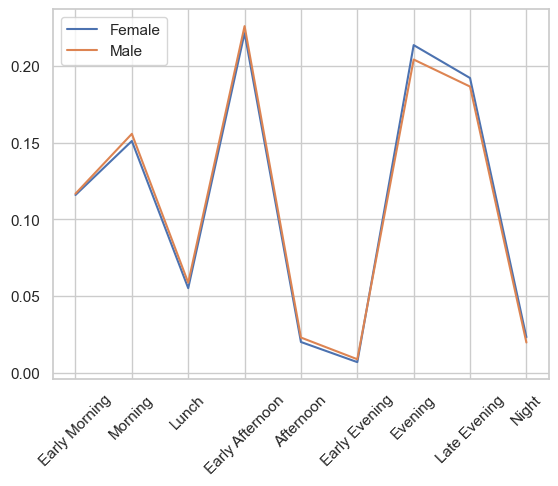

In [203]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=custom_order, y=time_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=custom_order, y=time_dist['Male'].values,legend='brief',label='Male')


plt.xticks(rotation=45)

In [231]:
time_dist

gender  TimePeriod     
Female  Early Afternoon    0.5
        Evening            0.5
dtype: float64

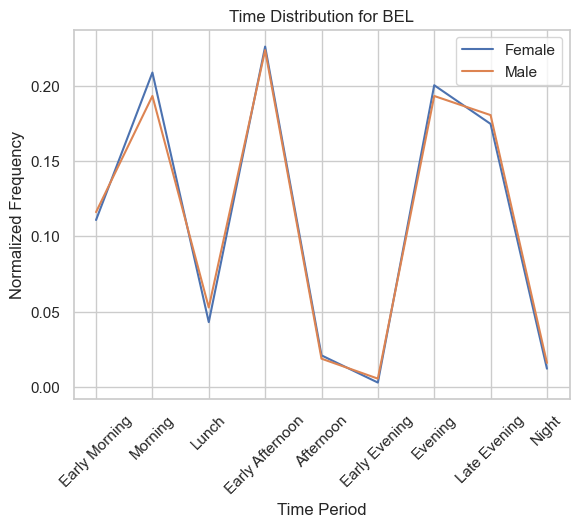

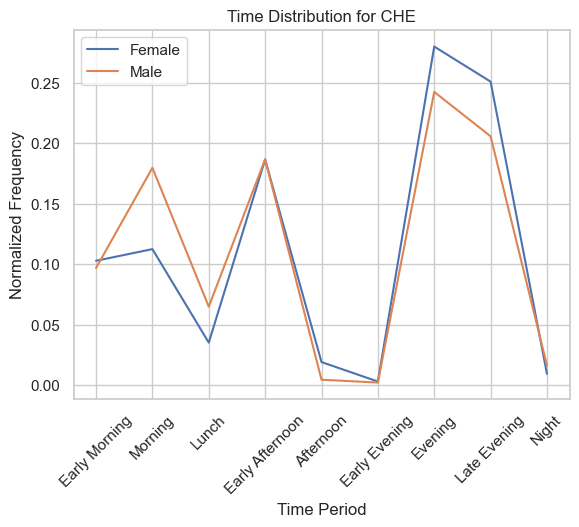

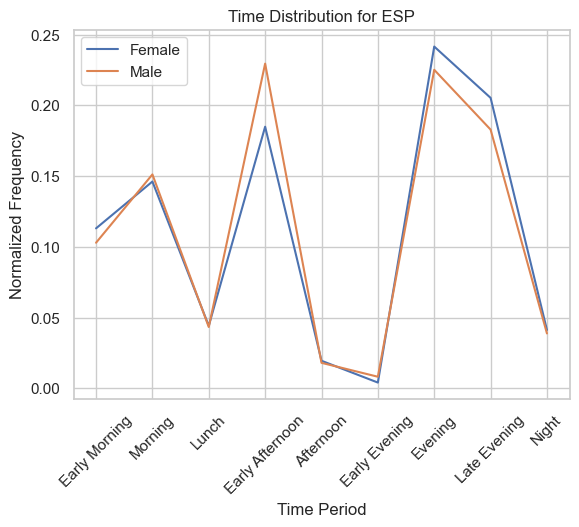

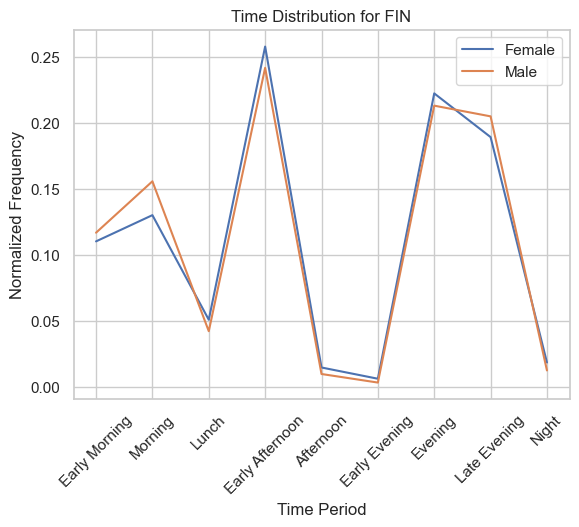

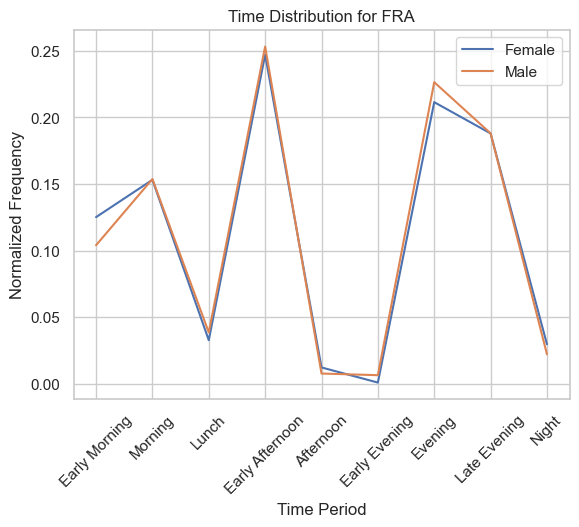

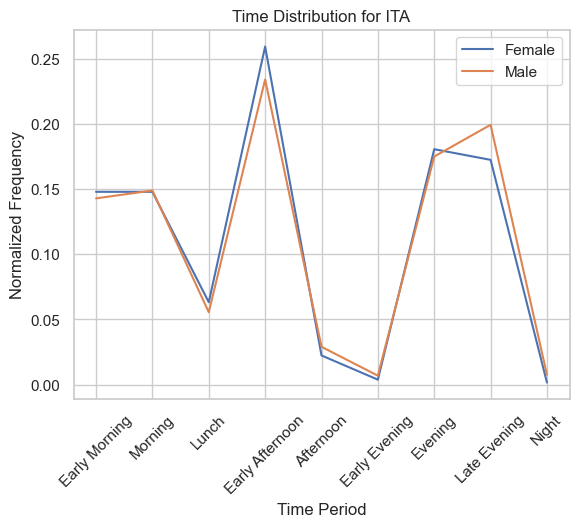

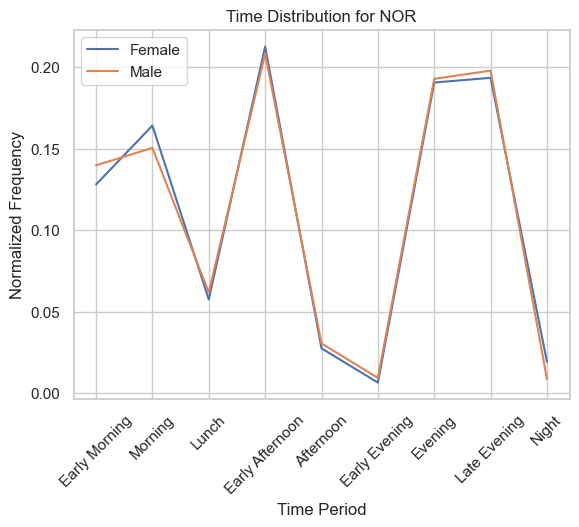

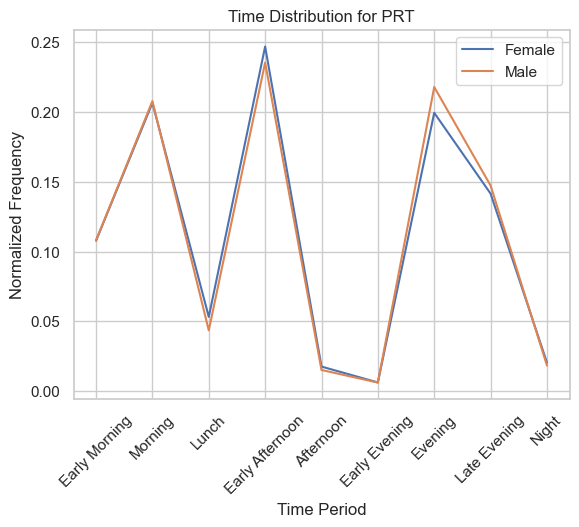

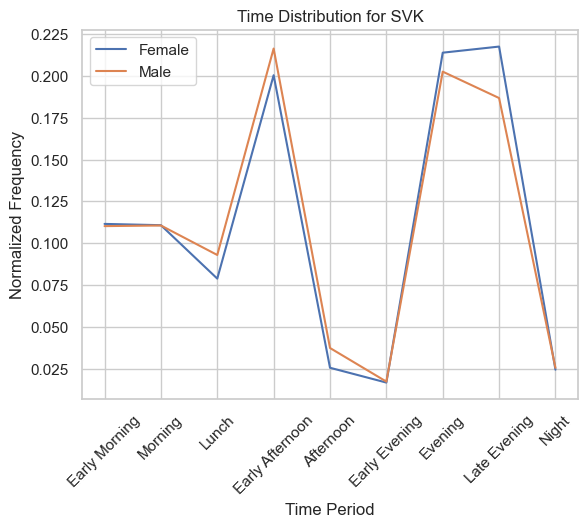

In [230]:
for coun in sorted(leg_coor_user_merged['country'].unique()):
    only_country=leg_coor_user_merged[leg_coor_user_merged['country'].isin([coun])]
    time_dist = only_country.drop_duplicates(subset='tripid').groupby(['gender', 'TimePeriod']).size() / only_country.drop_duplicates(subset='tripid').dropna(subset=['TimePeriod']).groupby('gender').size()
    try:
        sns.lineplot(x=custom_order, y=time_dist['Female'].values, legend='brief', label='Female')
        sns.lineplot(x=custom_order, y=time_dist['Male'].values, legend='brief', label='Male')
        #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
        
        plt.xticks(rotation=45)
        plt.title(f'Time Distribution for {coun}')
        plt.xlabel('Time Period')
        plt.ylabel('Normalized Frequency')
        plt.legend()
        plt.show()
    except:
        pass


In [240]:
leg_coor_user_merged

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household,start_point,time_in_seconds,Hour,TimePeriod
65308,#24:31446,Leg,cVOseooFD9PPBlwyozDWiUNQ7K03,#30:13519,7,2019-10-11 14:55:57.521,2019-10-11 15:01:20.815,349.0,349.0,0.0,...,PRT,NaN,Married,4,Employed full Time,More than 5,POINT (-9.14000 38.73700),18611.0,5,Early Morning
65410,#23:37926,Leg,piEqpygtEyej7lfGEBRwImafopi1,#33:16242,7,2019-10-25 19:45:58.936,2019-10-25 19:47:57.896,0.0,219.0,0.0,...,PRT,NaN,Single,4,Employed full Time,1 to 5,POINT (-9.14800 38.73800),23683.0,6,Early Morning
65409,#22:37966,Leg,piEqpygtEyej7lfGEBRwImafopi1,#33:16242,7,2019-10-25 19:34:39.523,2019-10-25 19:40:44.699,0.0,262.0,0.0,...,PRT,NaN,Single,4,Employed full Time,1 to 5,POINT (-9.15000 38.73700),27138.0,7,Early Morning
65408,#24:37876,Leg,piEqpygtEyej7lfGEBRwImafopi1,#30:16372,7,2019-10-25 15:06:23.516,2019-10-25 15:17:41.030,0.0,870.0,0.0,...,PRT,NaN,Single,4,Employed full Time,1 to 5,POINT (-9.15000 38.73800),26089.0,7,Early Morning
65407,#25:37293,Leg,piEqpygtEyej7lfGEBRwImafopi1,#32:16024,7,2019-10-25 12:12:50.265,2019-10-25 12:18:44.981,0.0,413.0,0.0,...,PRT,NaN,Single,4,Employed full Time,1 to 5,POINT (-9.15000 38.73800),26089.0,7,Early Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51883,#23:29658,Leg,orSdDvHX8ogtDutlnurSKPANFAu2,#30:12674,7,2019-10-11 20:30:54.329,2019-10-11 20:39:13.106,406.0,406.0,0.0,...,NOR,NaN,NaN,NaN,NaN,NaN,POINT (5.30400 60.30400),13156.0,3,Night
49895,#24:25723,Leg,qVRnjhhq73Z9YKqyt9rzFQFyPGm2,#33:10934,7,2019-10-05 13:35:49.620,2019-10-05 13:39:36.500,471.0,471.0,0.0,...,NOR,University,Married,5+,Employed full Time,More than 5,POINT (10.78800 59.91400),7565.0,2,Night
94541,#226:9948,WaitingEvent,cHUP8obwE3egXmn1MEm69LctVkq2,#132:15511,4,2019-11-07 15:27:01.255,2019-11-07 15:31:30.664,NaN,NaN,0.0,...,SVK,Basic (up to 10th grade),Divorced,4,Employed full Time,NaN,POINT (18.72200 49.21400),15159.0,4,Night
51885,#24:29931,Leg,orSdDvHX8ogtDutlnurSKPANFAu2,#31:12776,7,2019-10-12 10:24:56.320,2019-10-12 10:27:12.495,126.0,126.0,0.0,...,NOR,NaN,NaN,NaN,NaN,NaN,POINT (5.30400 60.30400),14444.0,4,Night


In [232]:
#Return relative frequency of time period per each gender
hours_dist = leg_coor_user_merged.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / leg_coor_user_merged.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby('gender').size()
hours_dist 

gender  Hour
Female  0       0.001206
        1       0.001166
        2       0.001126
        3       0.005026
        4       0.016002
                  ...   
Other   18      0.053435
        19      0.022901
        20      0.022901
        21      0.053435
        22      0.007634
Length: 68, dtype: float64

### Distribution by hour

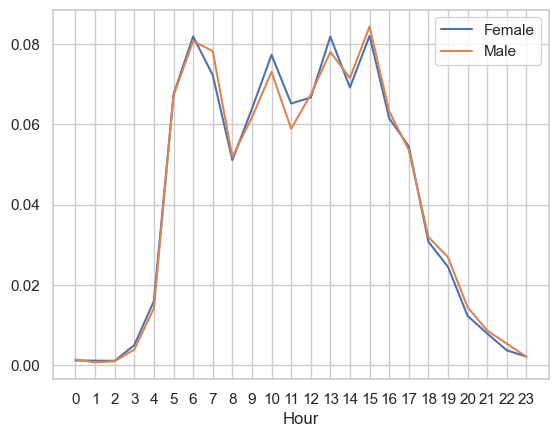

In [239]:
sns.set_theme(style="whitegrid")
sns.lineplot(x=hours_dist['Female'].index, y=hours_dist['Female'].values,legend='brief',label='Female')
sns.lineplot(x=hours_dist['Male'].index, y=hours_dist['Male'].values,legend='brief',label='Male')
#sns.lineplot(x=hours_dist['Other'].index, y=hours_dist['Other'].values,legend='brief',label='Other')
plt.xticks(np.arange(0, 24, 1.0),rotation=0);


In [257]:
campaign_data = leg_coor_user_merged[leg_coor_user_merged['country'] == cou]
only_country=leg_coor_user_merged[leg_coor_user_merged['country'].isin([cou])]


In [258]:
only_country

,legid,class,userid,tripid,motid,start_date,end_date,true_distance,leg_distance,leg_duration,...,country,education_level,marital_status_household,number_people_household,labour_status_household,years_of_residence_household,start_point,time_in_seconds,Hour,TimePeriod
127811,#224:37371,Leg,vwOIavsPsZhVtKdOd86R2cTVx5A2,#133:16263,1,2019-11-15 09:21:24.480,2019-11-15 09:45:26.272,0.000,4529.414,1330.002,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.59000 55.64300),25490.0,7,Early Morning
127810,#222:37379,Leg,vwOIavsPsZhVtKdOd86R2cTVx5A2,#131:16273,1,2019-11-14 19:33:28.192,2019-11-14 19:50:56.768,3423.187,3423.187,1022.975,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.62000 55.62400),25224.0,7,Early Morning
127806,#222:37380,Leg,vwOIavsPsZhVtKdOd86R2cTVx5A2,#130:16277,1,2019-11-14 13:46:07.744,2019-11-14 13:54:52.032,0.000,663.180,463.658,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.54300 55.65100),57635.0,16,Afternoon
127807,#227:10465,WaitingEvent,vwOIavsPsZhVtKdOd86R2cTVx5A2,#130:16277,4,2019-11-14 14:01:25.248,2019-11-14 14:07:58.464,NaN,NaN,0.000,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.55200 55.65000),58095.0,16,Afternoon
127808,#223:37377,Leg,vwOIavsPsZhVtKdOd86R2cTVx5A2,#130:16277,1,2019-11-14 14:07:58.464,2019-11-14 14:27:38.112,0.000,3544.234,1175.008,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.55000 55.65000),58958.0,16,Afternoon
127809,#223:37376,Leg,vwOIavsPsZhVtKdOd86R2cTVx5A2,#132:16267,1,2019-11-14 16:12:29.568,2019-11-14 16:32:09.216,0.000,3513.849,1249.000,...,DNK,NaN,NaN,NaN,NaN,NaN,POINT (12.59000 55.64400),59210.0,16,Afternoon


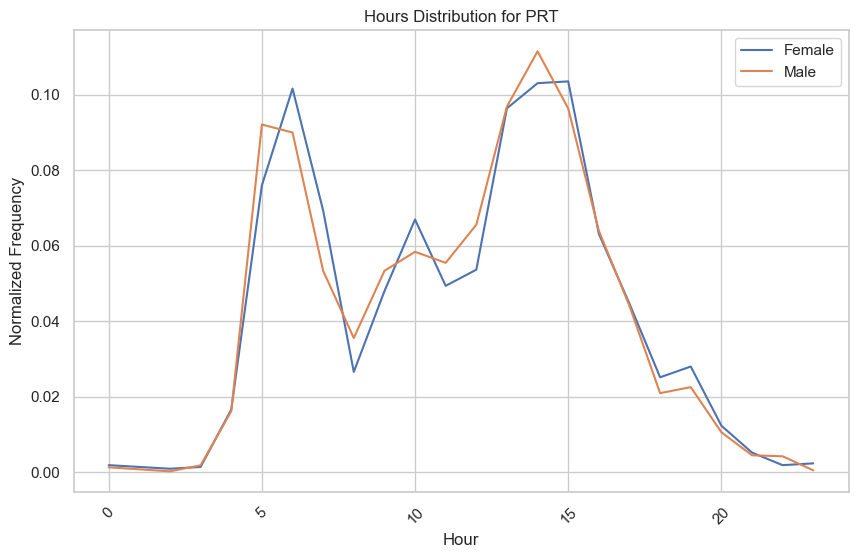

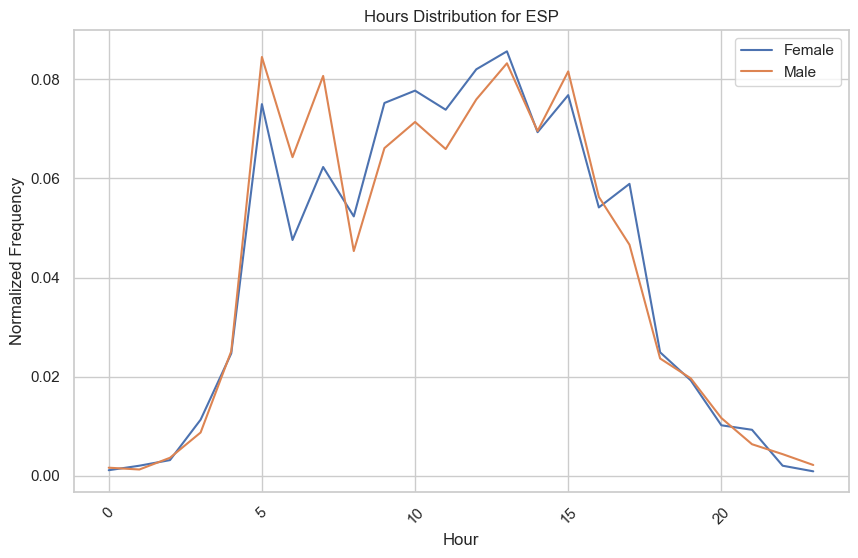

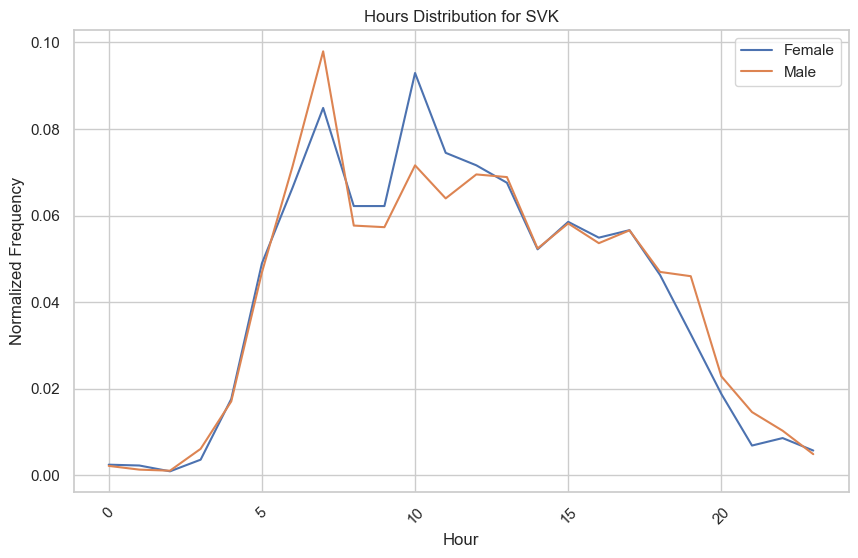

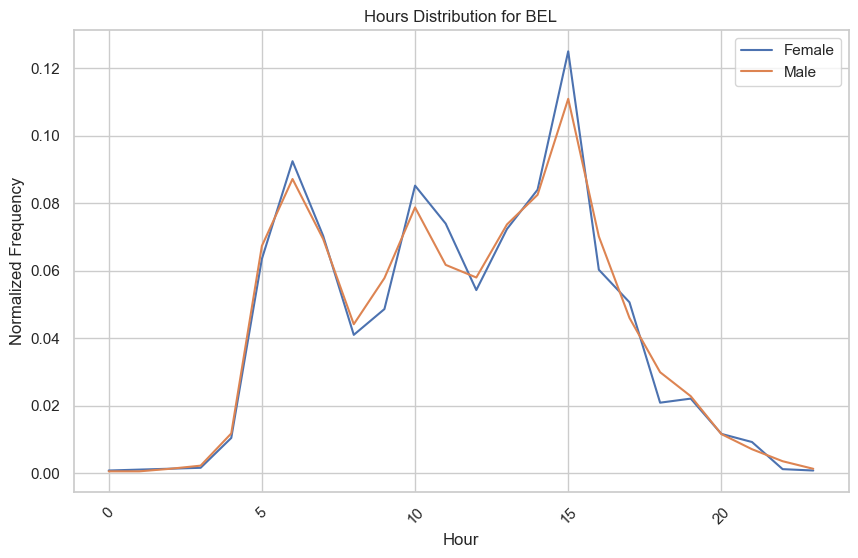

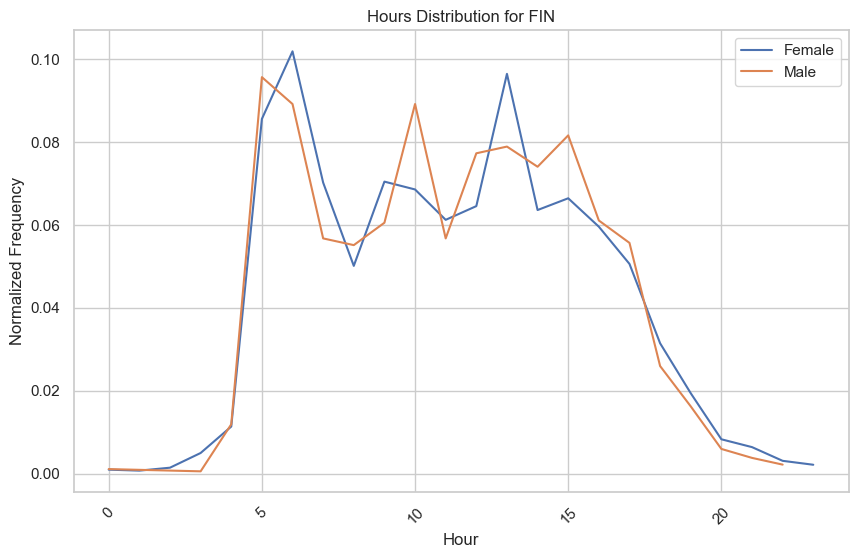

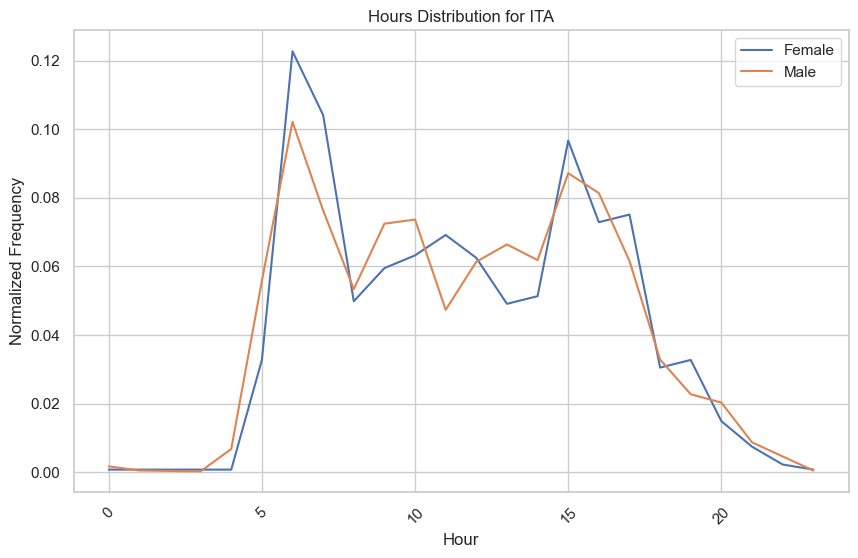

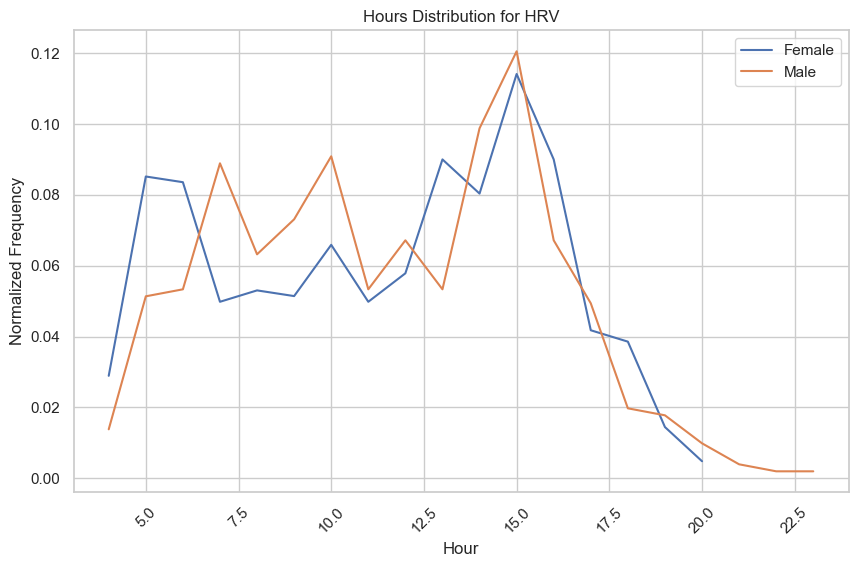

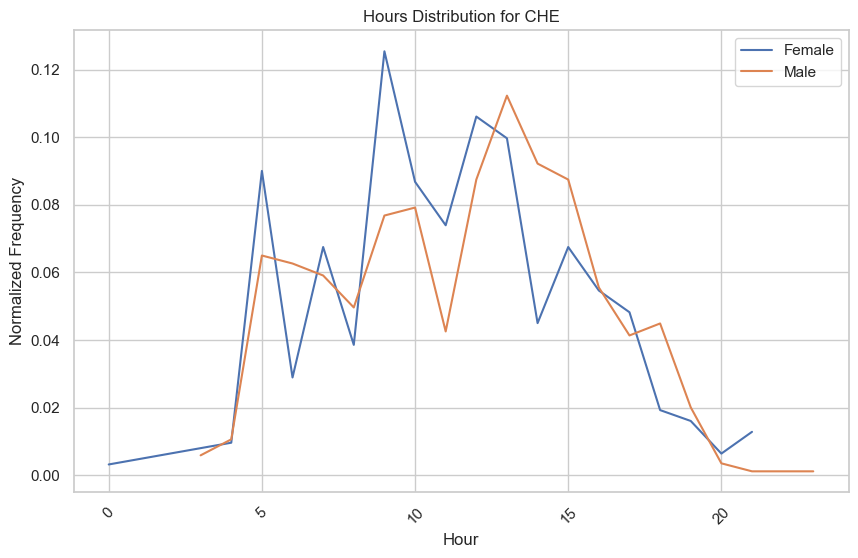

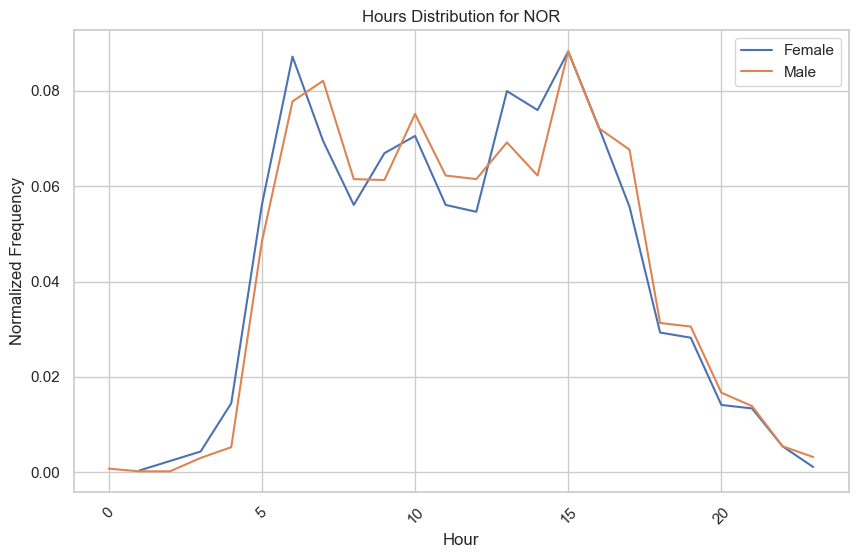

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

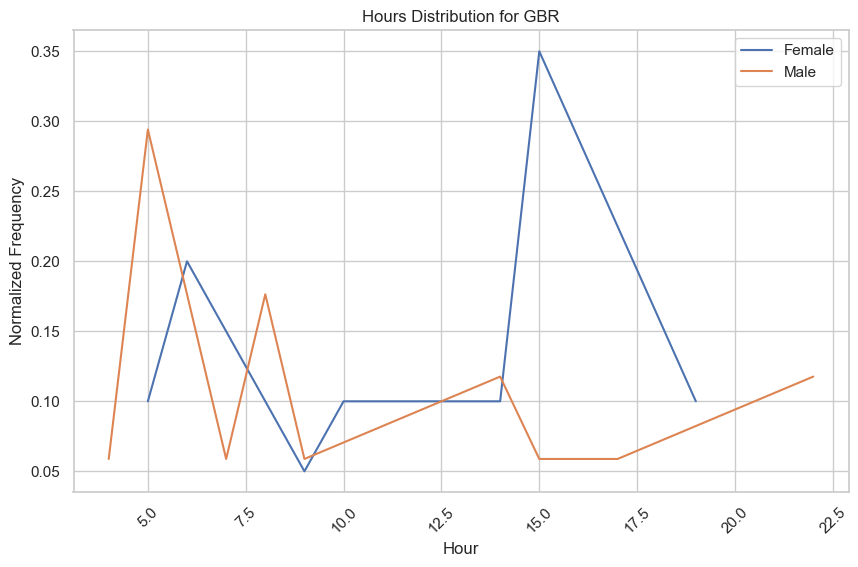

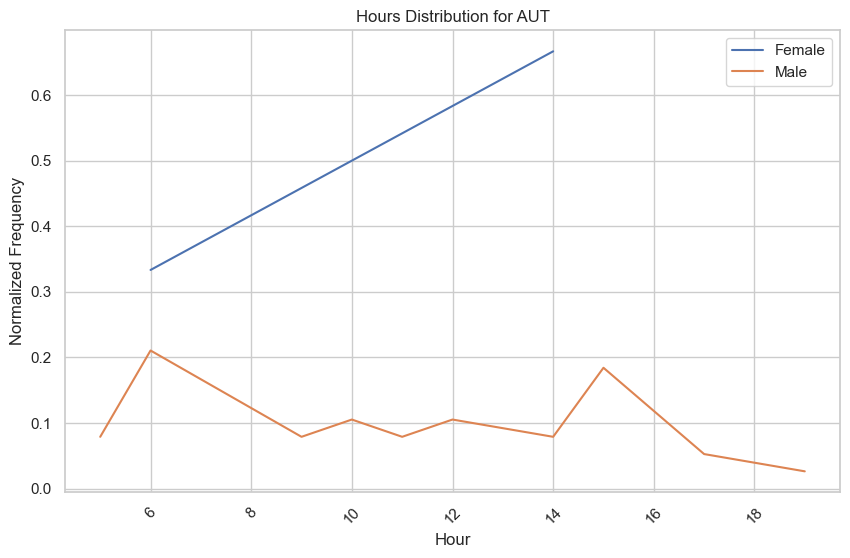

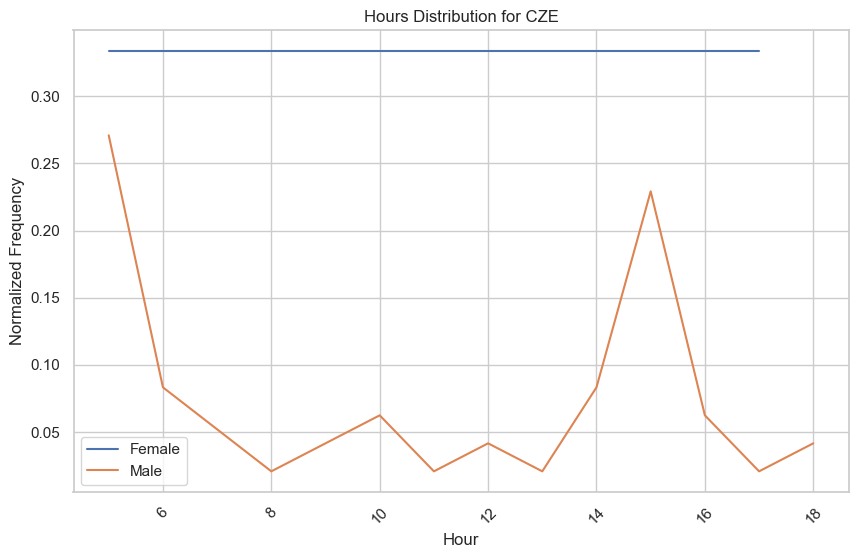

<Figure size 1000x600 with 0 Axes>

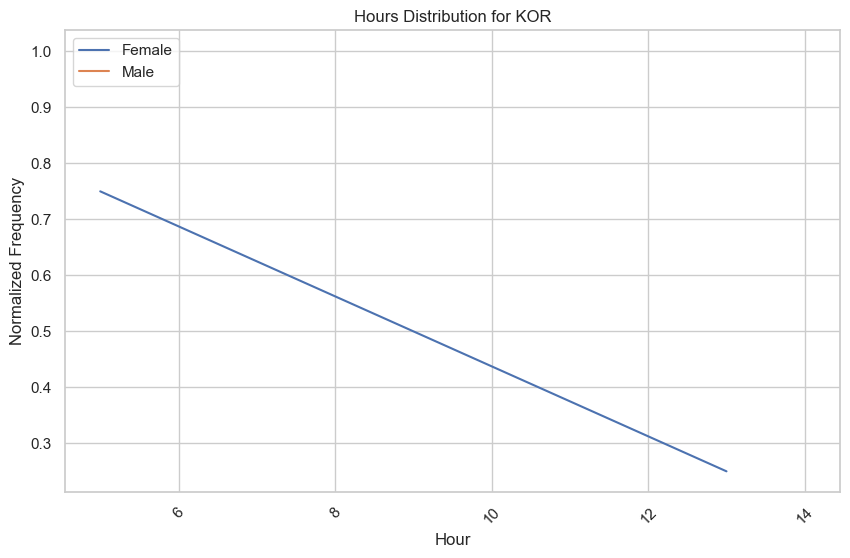

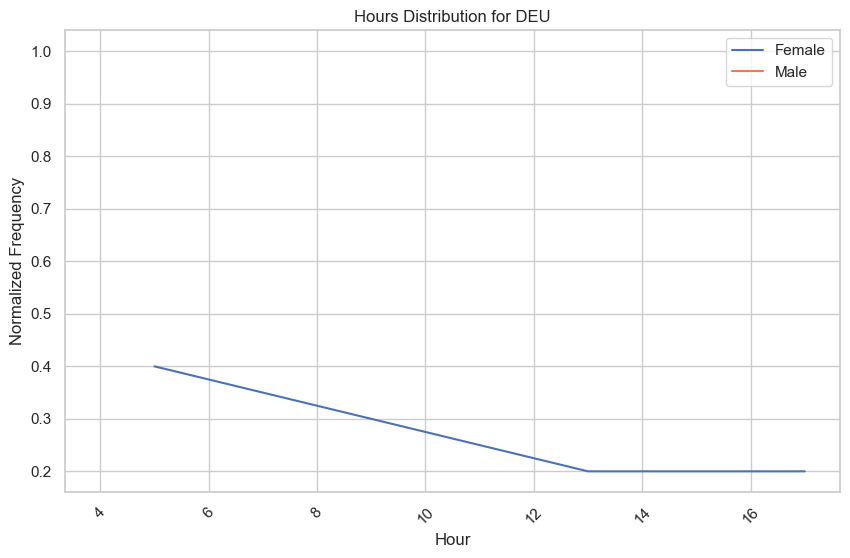

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

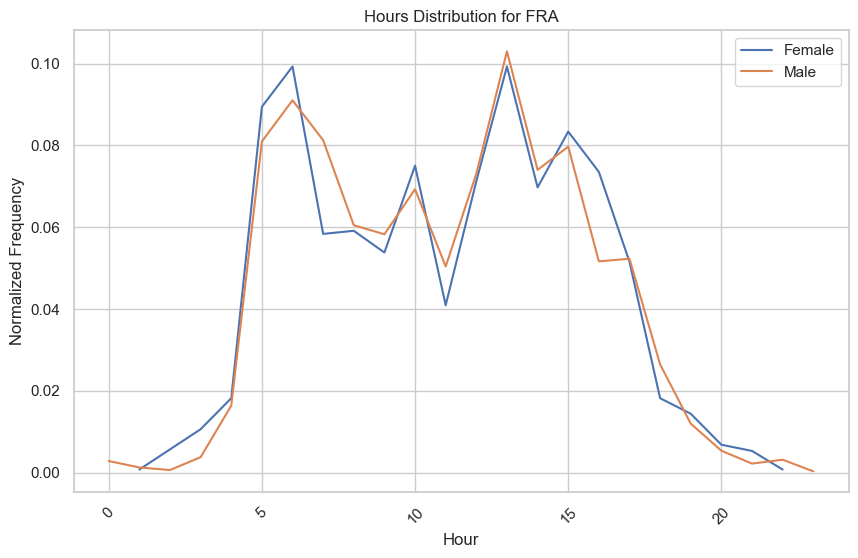

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [267]:

# Iterate over campaigns
for cou in leg_coor_user_merged['country'].unique():
    # Filter data for the current campaign
    only_country=leg_coor_user_merged[leg_coor_user_merged['country'].isin([cou])]

    # Calculate time distribution
    hours_dist = only_country.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / only_country.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby(['gender']).size()
    try:
        # Plot the graph for the current campaign
        fig = plt.figure(figsize=(10, 6))
        sns.lineplot(x=hours_dist['Female'].index, y=hours_dist['Female'].values, legend='brief', label='Female')
        sns.lineplot(x=hours_dist['Male'].index, y=hours_dist['Male'].values, legend='brief', label='Male')
        #sns.lineplot(x=time_dist['Other'].index, y=time_dist['Other'].values, legend='brief', label='Other')
        
        plt.xticks(rotation=45)
        plt.title(f'Hours Distribution for {cou}')
        plt.xlabel('Hour')
        plt.ylabel('Normalized Frequency')
        plt.legend()
        plt.show()
    except:
        plt.clf()
        pass

In [291]:
from scipy.stats import ks_2samp
from scipy import stats
# Iterate over campaigns
for cou in leg_coor_user_merged['country'].unique():
    # Filter data for the current campaign
    only_country = leg_coor_user_merged[leg_coor_user_merged['country'].isin([cou])]

    # Calculate time distribution
    hours_dist = only_country.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / only_country.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby(['gender']).size()

    try:
        _, p_male = stats.shapiro(hours_dist['Male'])
        _, p_female = stats.shapiro(hours_dist['Female'])

        alpha = 0.05  # Or whatever you want your alpha to be.
        if p_male > alpha and p_female > alpha:
            print("Both Male and Female hours_dist data are normally distributed. Proceed with t-test.")
        else:
            print("Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.")

    except:
        pass


Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Both Male and Female hours_dist data are normally distributed. Proceed with t-test.
Both Male and Female hours_dist data are normally distributed. Proceed with t-test.
Either or both Male and Female hours_dist data are not normally distributed. Proceed with Mann-Whitney U test.
Either or both Male and Female hours_dist data are not 

In [295]:
for cou in leg_coor_user_merged['country'].unique():
    # Filter data for the current campaign
    only_country = leg_coor_user_merged[leg_coor_user_merged['country'].isin([cou])]

    # Calculate time distribution
    hours_dist = only_country.drop_duplicates(subset='tripid').groupby(['gender', 'Hour']).size() / only_country.drop_duplicates(subset='tripid').dropna(subset=['Hour']).groupby(['gender']).size()
    try:
# Mann-Whitney U test
        
        u_stat, p_val = stats.mannwhitneyu(hours_dist['Male'], 
                                        hours_dist['Female'])
        print(f'Country: {cou}')
        print('Mann-Whitney U test')
        print('u-statistic:', u_stat)
        print('p-value:', p_val)
        print('............')
        # Welch's t-test
        print('Welch\'s t-test')
        t_stat, p_val = stats.ttest_ind(hours_dist['Male'], 
                                        hours_dist['Female'], 
                                        equal_var=False)

        print('t-statistic:', t_stat)
        print('p-value:', p_val)
        print('\n\n')
    except:
        pass


Country: PRT
Mann-Whitney U test
u-statistic: 277.0
p-value: 0.9915091228204771
............
Welch's t-test
t-statistic: 0.17037075873916963
p-value: 0.8654840565826396



Country: ESP
Mann-Whitney U test
u-statistic: 289.0
p-value: 0.9917740945477351
............
Welch's t-test
t-statistic: 0.0
p-value: 1.0



Country: SVK
Mann-Whitney U test
u-statistic: 281.0
p-value: 0.8933777618187176
............
Welch's t-test
t-statistic: 0.0
p-value: 1.0



Country: BEL
Mann-Whitney U test
u-statistic: 247.0
p-value: 0.7166950158457059
............
Welch's t-test
t-statistic: -0.3652708989838874
p-value: 0.7166890744401462



Country: FIN
Mann-Whitney U test
u-statistic: 276.0
p-value: 0.5928720277619648
............
Welch's t-test
t-statistic: 0.5943406011125785
p-value: 0.5554489834253165



Country: ITA
Mann-Whitney U test
u-statistic: 255.0
p-value: 0.9728205188478125
............
Welch's t-test
t-statistic: -0.19135268143584389
p-value: 0.8491710818549214



Country: HRV
Mann-Whitney U te

/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/599924567.py:19: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/599924567.py:19: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning:

divide by zero encountered in divide

/Users/zavidos/mambaforge/envs/ds/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning:

invalid value encountered in scalar multiply

/var/folders/9h/wspygsdd64nc8w1bt957q7t40000gn/T/ipykernel_72023/599924567.py:19: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This 